# Q2

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Weibull.csv')

In [4]:
k = 2
n = len(data)

In [5]:
def likelihood_fn_weibull(lamda, data):
    if lamda <= 0:
        return np.inf
    log_likelihood = -np.sum(np.log(2) - 2 * np.log(lamda) + np.log(data) - (data / lamda) ** 2)
    return log_likelihood

In [6]:
for i in range(10):
    bounds = [(1e-6, None)]  
    lam_weibull = minimize(likelihood_fn_weibull, i, args=(data['X'],), method='Powell', bounds=bounds)
    print(lam_weibull.x, i)

[6.58194043] 0
[6.58154638] 1
[6.58154641] 2
[6.58154637] 3
[6.58154635] 4
[6.58154633] 5
[6.58154639] 6
[6.58154364] 7
[6.58154364] 8
[6.58154364] 9


In [7]:
sqr_sum = 0
for i in data.X:
  sqr_sum += i ** 2
lam_weibull_calc = (sqr_sum / n) ** 0.5
lam_weibull_calc

6.581546404774335

In [8]:
def likelihood_fn_rayleigh(sigma, data):
    if sigma <= 0:
        return -np.inf
    return -np.sum(-2 * np.log(sigma) + np.log(data) - 0.25 * (data / sigma) ** 2)

In [9]:
for i in range(0,10):
  bounds = [(1e-6, None)] 
  sigma_rayleigh = minimize(likelihood_fn_rayleigh, i, args = (data['X'],), method = 'Powell', bounds = bounds)
  print(sigma_rayleigh.x, i)

[3.29074687] 0
[3.2907732] 1
[3.2907732] 2
[3.29077318] 3
[3.29076151] 4
[3.29076151] 5
[3.29076151] 6
[3.29076151] 7
[3.29076152] 8
[3.29076151] 9


In [10]:
sigma_rayleigh_calc = (0.5 * sqr_sum / n) ** 0.5
sigma_rayleigh_calc

4.653856093509875

In [11]:
print("MLE estimate of λ (Weibull):", lam_weibull_calc)
print("MLE estimate of σ (Rayleigh):", sigma_rayleigh_calc)

MLE estimate of λ (Weibull): 6.581546404774335
MLE estimate of σ (Rayleigh): 4.653856093509875


# Q4

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
df = pd.read_csv('Gene_expression.csv')

In [14]:
# Convert the selected data to a NumPy array
data = np.array(df)

In [15]:
data

array([[44.23856953, 46.32756761, 49.33670648, 49.93000048, 52.15501011,
        56.0828971 , 57.75831725, 45.89022541, 60.45472472, 51.59134855],
       [65.90939535, 57.12291845, 51.4686087 , 52.99571123, 56.32035513,
        54.21490678, 38.06422753, 62.53374416, 53.10527894, 55.36490963],
       [57.21915456, 59.88192727, 54.66953869, 51.55290527, 47.54784521,
        38.944785  , 65.59859592, 55.01108521, 53.2758098 , 57.24907549],
       [46.61596766, 61.67398822, 43.84466132, 61.29665911, 48.10703667,
        55.13740149, 43.69748715, 61.93258031, 49.23991059, 51.80810613],
       [46.00223746, 56.66640143, 52.6672275 , 57.55416647, 66.11898762,
        57.57439412, 59.34329535, 55.08442535, 57.49476686, 56.69855535],
       [58.75442126, 61.23391731, 56.66776774, 56.66468411, 46.09828197,
        58.86178489, 56.82222136, 58.65124218, 58.27710937, 49.21204761],
       [50.66888261, 54.41480639, 44.65471414, 40.29891803, 46.3924186 ,
        46.40496237, 55.29217732, 64.87554371

In [16]:
# Initialise prior parameters using Day 1 data
prior_mean = np.mean(data[:,0])
prior_variance = np.var(data[:,0])
prior_mean

53.0472556695

In [17]:
# Array for posterior parameter for each day till day 10
posterior_mean = [prior_mean]
posterior_variance = [prior_variance]

In [18]:
# Performing recursive Bayesian estimation
for d in range(1,10):
    curr_data = data[:,d]
    updated_mean = (prior_variance * np.mean(curr_data) + prior_mean * np.var(curr_data)) / (prior_variance + np.var(curr_data))
    updated_variance = 1 / (1/prior_variance + 1/np.var(curr_data))
    posterior_mean.append(updated_mean)
    posterior_variance.append(updated_variance)
    prior_mean = updated_mean
    prior_variance = updated_variance

In [19]:
print(posterior_mean)

[53.0472556695, 54.79347789504, 54.00033309003618, 54.32306365081989, 54.015625601429065, 53.9984463180054, 54.101884733435234, 54.54988316440594, 54.52540047396053, 54.567902688127454]


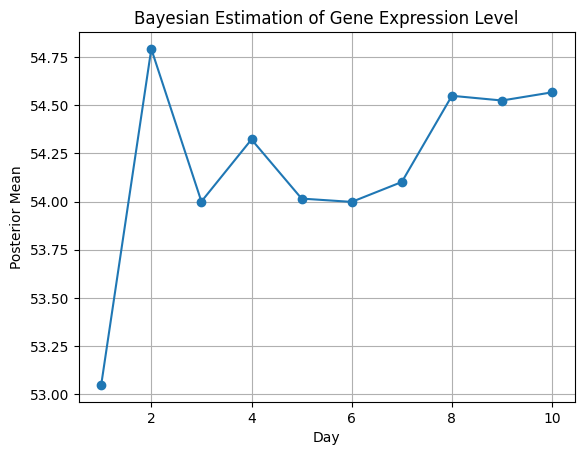

In [20]:
plt.plot(range(1, 11), posterior_mean, marker='o')
plt.xlabel('Day')
plt.ylabel('Posterior Mean')
plt.title('Bayesian Estimation of Gene Expression Level')
plt.grid(True)
plt.show()

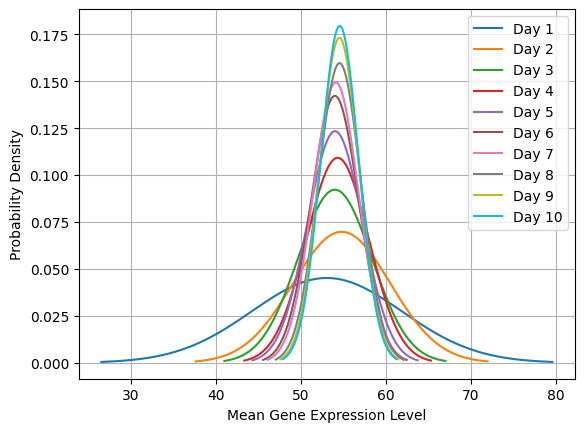

In [21]:
# Plot the probability distributions for each day
for d in range(10):
    x = np.linspace(posterior_mean[d] - 3 * np.sqrt(posterior_variance[d]),
                    posterior_mean[d] + 3 * np.sqrt(posterior_variance[d]), 1000)
    plt.plot(x, norm.pdf(x, posterior_mean[d], np.sqrt(posterior_variance[d])),
             label=f'Day {d + 1}')
plt.xlabel('Mean Gene Expression Level')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Q5

In [22]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [23]:
data = pd.read_csv('Rayleigh.csv')

In [24]:
def likelihood(sigma, data):
    return np.prod(data / sigma**2 * np.exp(-data**2 / (2 * sigma**2)))

In [25]:
def log_likelihood(sigma, data):
    return -np.sum(- np.log(data) + np.log(sigma**2) + data**2 / (2 * sigma**2))

In [26]:
def log_prior(sigma):
    mu = 15
    sigma_prior = 3
    return -0.5 * ((sigma - mu) / sigma_prior)**2 - np.log(sigma_prior * np.sqrt(2 * np.pi))

In [27]:
def log_posterior(sigma, data):
    return log_likelihood(sigma, data) + log_prior(sigma)

In [28]:
# Initial guess for sigma
initial_sigma = 1
result = minimize(lambda sigma: -log_posterior(sigma, data), initial_sigma, method='BFGS')

In [29]:
# The MAP estimate for sigma is in result.x
map_estimate_sigma = result.x[0]

print("MAP estimate for sigma:", map_estimate_sigma)

MAP estimate for sigma: 6.461205744701753
